<a href="https://colab.research.google.com/github/rohananpothle/Customer-Purchase-Behavior-in-a-Supermarket/blob/main/Rohan_Supermarket_Analysis_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/DataAnalysis/Data science projects/DataSets/Supermarket_data.csv')
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,1253241,152060,6,1,20,23.0,115,2,1,7,beverages,water seltzer sparkling water
1,3058717,44755,2,1,15,30.0,37,4,0,1,frozen,ice cream ice
2,2252307,169119,12,4,15,9.0,123,19,0,4,produce,packaged vegetables fruits
3,188072,162421,3,4,11,30.0,117,5,0,19,snacks,nuts seeds dried fruit
4,2627597,172693,19,0,23,5.0,17,8,0,13,pantry,baking ingredients


# Data preprocessing

In [70]:
print(data.shape)

(1000000, 12)


In [71]:
print("Data types before conversion:\n")
print(data.dtypes)

Data types before conversion:

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
department_id               int64
department                 object
product_name               object
dtype: object


In [72]:
missing_values = data.isnull().sum()

print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    61437
product_id                    0
add_to_cart_order             0
reordered                     0
department_id                 0
department                    0
product_name                  0
dtype: int64


In [73]:
data['days_since_prior_order'] = data['days_since_prior_order'].fillna(data['days_since_prior_order'].median())

missing_values = data.isnull().sum()

print("Missing values in each column after filling:\n")
print(missing_values)

Missing values in each column after filling:

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64


In [74]:
data_cleaned = data.drop(columns=['user_id', 'order_id','department','product_name'])
data_cleaned = data_cleaned.to_csv('data_cleaned.csv', index=False)

In [75]:
data_cleaned = pd.read_csv('/content/data_cleaned.csv')

In [76]:
data_cleaned.dtypes

,0
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64
department_id,int64


# Data normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler

# selecting bool data type columns
binary_columns = data_cleaned.select_dtypes(include=['bool']).columns


# Changing bool data type to integer
data_cleaned[binary_columns] = data_cleaned[binary_columns].astype(int)

numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

data_cleaned.head()


,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
0,0.050505,0.166667,0.869565,0.766667,0.857143,0.007353,1.0,0.30
1,0.010101,0.166667,0.652174,1.000000,0.270677,0.022059,0.0,0.00
2,0.111111,0.666667,0.652174,0.300000,0.917293,0.132353,0.0,0.15
3,0.020202,0.666667,0.478261,1.000000,0.872180,0.029412,0.0,0.90
4,0.181818,0.000000,1.000000,0.166667,0.120301,0.051471,0.0,0.60


In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

x = data_cleaned.loc[:10000]
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans.fit(x)

# Retrieve the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# Add cluster centers and labels to the original DataFrame
x['cluster_labels'] = kmeans.labels_

<ipython-input-78-f1cbf712e78b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster_labels'] = kmeans.labels_


In [79]:
sil_score = silhouette_score(x, labels)

In [80]:
print(f"Silhouette Score: {sil_score}")
print("Cluster Centers:\n")
print(centers)
print("\nCluster Labels:\n")
print(labels)

Silhouette Score: 0.5895408835838744
Cluster Centers:

[[ 6.55053529e-02  1.76646707e-01  5.95678209e-01  9.08516301e-01
   5.12463794e-01  6.38282259e-02 -3.55271368e-15  4.13972056e-01]
 [ 2.23275536e-01  1.70231729e-01  5.73209719e-01  2.62589127e-01
   5.38373005e-01  4.48205017e-02  1.00000000e+00  1.66878342e-01]
 [ 1.06511854e-01  2.06901489e-01  5.89757956e-01  2.64032073e-01
   7.34348758e-01  6.25379018e-02  8.21565038e-15  5.03651203e-01]
 [ 2.40788103e-01  7.60585394e-01  5.79080025e-01  2.46746235e-01
   5.63896955e-01  4.89005065e-02  1.00000000e+00  7.73017903e-01]
 [ 8.59508606e-02  4.27933415e-01  5.89260181e-01  9.22939505e-01
   5.44604508e-01  4.52282009e-02  1.00000000e+00  4.25761267e-01]
 [ 1.16454215e-01  8.31234257e-01  5.83214690e-01  2.30310663e-01
   5.42489726e-01  5.86197955e-02  9.10382880e-15  4.41435768e-01]
 [ 2.40004888e-01  8.04166667e-01  5.89691445e-01  2.47392473e-01
   4.50927723e-01  4.51968691e-02  1.00000000e+00  1.63548387e-01]
 [ 1.09566251e

In [81]:
x.cluster_labels.value_counts()

,count
cluster_labels,
1,1493
6,1243
5,1191
3,1173
8,1173
2,1164
4,821
7,765
0,501


In [82]:
x[['user_id', 'department', 'product_name', 'order_id']] = data[['user_id', 'department', 'product_name', 'order_id']].loc[x.index]
#data[['department_name', 'product_name']]

<ipython-input-82-c08eb648158b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['user_id', 'department', 'product_name', 'order_id']] = data[['user_id', 'department', 'product_name', 'order_id']].loc[x.index]
<ipython-input-82-c08eb648158b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['user_id', 'department', 'product_name', 'order_id']] = data[['user_id', 'department', 'product_name', 'order_id']].loc[x.index]
<ipython-input-82-c08eb648158b>:1: SettingWithCopyWarning: 
A value is trying to be se

In [83]:
cols = [col for col in x.columns if col != 'cluster_labels']  # Get all columns except 'cluster_labels'
x = x[cols + ['cluster_labels']]  # Concatenate the columns and move 'cluster_labels' to the end
x.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,user_id,department,product_name,order_id,cluster_labels
0,0.050505,0.166667,0.869565,0.766667,0.857143,0.007353,1.0,0.30,152060,beverages,water seltzer sparkling water,1253241,4
1,0.010101,0.166667,0.652174,1.000000,0.270677,0.022059,0.0,0.00,44755,frozen,ice cream ice,3058717,0
2,0.111111,0.666667,0.652174,0.300000,0.917293,0.132353,0.0,0.15,169119,produce,packaged vegetables fruits,2252307,5
3,0.020202,0.666667,0.478261,1.000000,0.872180,0.029412,0.0,0.90,162421,snacks,nuts seeds dried fruit,188072,9
4,0.181818,0.000000,1.000000,0.166667,0.120301,0.051471,0.0,0.60,172693,pantry,baking ingredients,2627597,7


In [84]:
pivoted_df = x.pivot_table(index='department', columns='cluster_labels', values='product_name', aggfunc='count')
pivoted_df_normalized = pivoted_df.div(pivoted_df.sum(axis=1), axis=0)
pivoted_df_normalized.fillna(0, inplace=True)
pivoted_df_normalized
#pivoted_df

cluster_labels,0,1,2,3,4,5,6,7,8,9
department,,,,,,,,,,
alcohol,0.054054,0.162162,0.054054,0.000000,0.081081,0.135135,0.324324,0.135135,0.000000,0.054054
babies,0.014286,0.000000,0.250000,0.314286,0.035714,0.128571,0.000000,0.000000,0.200000,0.057143
bakery,0.056548,0.336310,0.110119,0.000000,0.095238,0.098214,0.247024,0.029762,0.000000,0.026786
beverages,0.051282,0.308858,0.102564,0.000000,0.106061,0.123543,0.224942,0.046620,0.000000,0.036131
breakfast,0.044118,0.000000,0.171569,0.240196,0.132353,0.107843,0.000000,0.029412,0.254902,0.019608
bulk,0.000000,0.222222,0.111111,0.000000,0.000000,0.222222,0.111111,0.333333,0.000000,0.000000
canned goods,0.064706,0.000000,0.226471,0.179412,0.058824,0.167647,0.000000,0.002941,0.214706,0.085294
dairy eggs,0.036458,0.000000,0.108218,0.289931,0.090278,0.090856,0.000000,0.057292,0.282407,0.044560
deli,0.048338,0.000000,0.114804,0.283988,0.060423,0.090634,0.000000,0.069486,0.274924,0.057402


In [85]:
data.department.unique().tolist()[0]

'beverages'

<ipython-input-86-3903d136b21a>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(cluster_counts)).colors  # Distinct colors


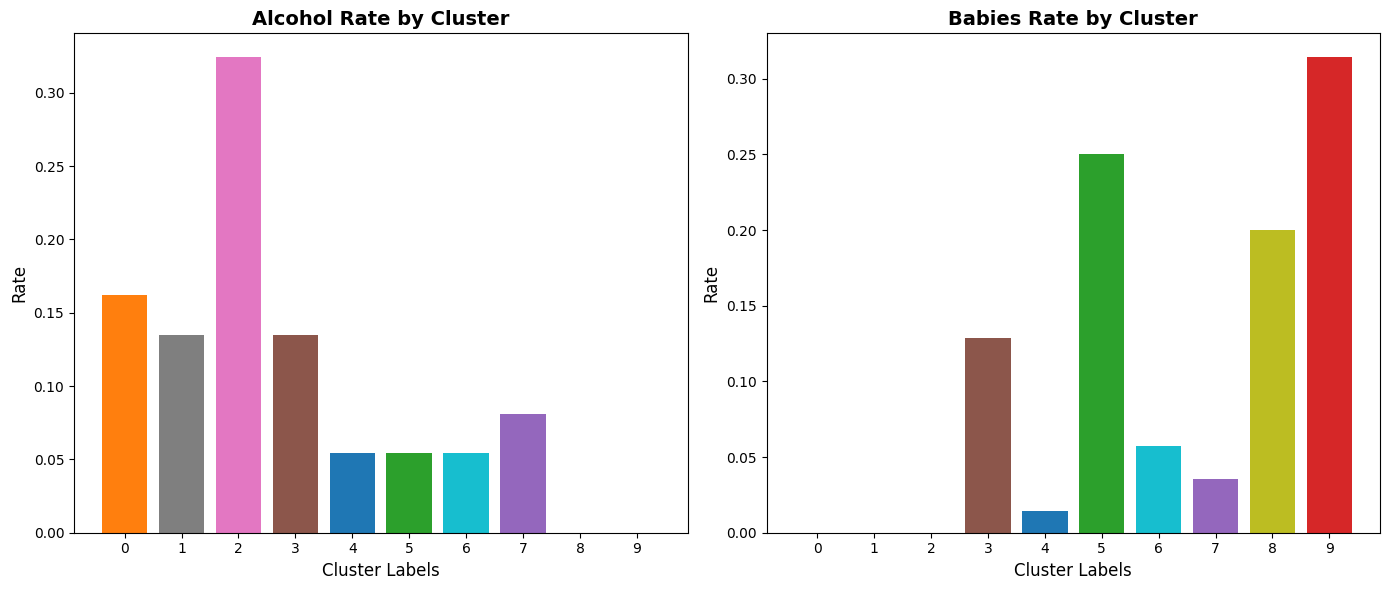

In [86]:
cluster_counts = x['cluster_labels'].unique()

# Define colors for the bars
colors = plt.cm.get_cmap("tab10", len(cluster_counts)).colors  # Distinct colors

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for Alcohol Rate by Cluster (First Subplot)
pivoted_df_normalized_alcohol = pivoted_df_normalized.iloc[0]
bars1 = axes[0].bar(cluster_counts, pivoted_df_normalized_alcohol, color=colors)
axes[0].set_title('Alcohol Rate by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster Labels', fontsize=12)
axes[0].set_ylabel('Rate', fontsize=12)
axes[0].set_xticks(cluster_counts)

# Plot for Babies Rate by Cluster (Second Subplot)
pivoted_df_normalized_babies = pivoted_df_normalized.iloc[1]
bars2 = axes[1].bar(cluster_counts, pivoted_df_normalized_babies, color=colors)
axes[1].set_title('Babies Rate by Cluster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster Labels', fontsize=12)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].set_xticks(cluster_counts)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()